logs/encoder_freeze_100k/train_fixed.log
time_elapsed: 20977 seconds or 349 minutes
Final reward:  799.5091478700534
logs/CURL_100k/train.log
time_elapsed: 32594 seconds or 543 minutes
Final reward:  738.4298824440219


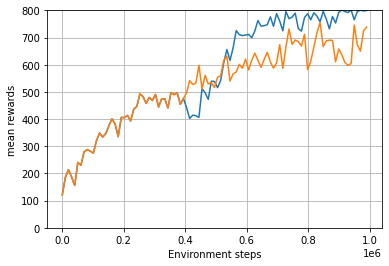

logs/encoder_freeze_100k/train_fixed.log
time_elapsed: 20977 seconds or 349 minutes
Final reward:  786.4208591179829
logs/CURL_100k/train.log
time_elapsed: 32594 seconds or 543 minutes
Final reward:  662.9617482038088


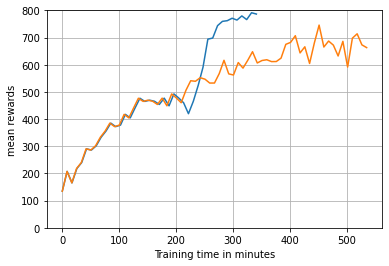

In [29]:
import json
import os
import time

import numpy as np
from matplotlib import pyplot as plt
from torch.utils.tensorboard import SummaryWriter

import utils
from logger import Logger
from plot_data import plot_data, read_file, create_average_reward_list, plot_average
from train import make_agent, parse_args

calculate_average_each_step = 10000
average_over_last_steps = 10000
plot_data("encoder_freeze_100k/train_fixed.log", average_over_last_steps=average_over_last_steps,
          calculate_average_each_step=calculate_average_each_step,
          max_step=10e5)

plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
          calculate_average_each_step=calculate_average_each_step, max_step=10e5)
plt.ylim((0,800))
plt.grid()
plt.savefig("docs/images/freezed_encoder_steps")
plt.show()

calculate_average_each_step_time = calculate_average_each_step / 20
average_over_last_steps_time = average_over_last_steps / 20
plot_data("encoder_freeze_100k/train_fixed.log", average_over_last_steps=average_over_last_steps_time,
          calculate_average_each_step=calculate_average_each_step_time,
          max_step=10e5, x_axis_duration=True)

plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps_time,
          calculate_average_each_step=calculate_average_each_step_time, max_step=10e5, x_axis_duration=True)
# plt.xlabel()
plt.ylim((0,800))
plt.grid()
plt.savefig("docs/images/freezed_encoder_minutes")
plt.show()

logs/CURL_5k/train.log
time_elapsed: 104440 seconds or 1740 minutes
Final reward:  436.61646511266974
logs/CURL_50k/train.log
time_elapsed: 107036 seconds or 1783 minutes
Final reward:  669.9175916218721
logs/CURL_100k/train.log
time_elapsed: 32594 seconds or 543 minutes
Final reward:  699.5373642954723
[<matplotlib.lines.Line2D object at 0x7f9f1f03bef0>, <matplotlib.lines.Line2D object at 0x7f9f1f220940>, <matplotlib.lines.Line2D object at 0x7f9f1f03bdd8>]


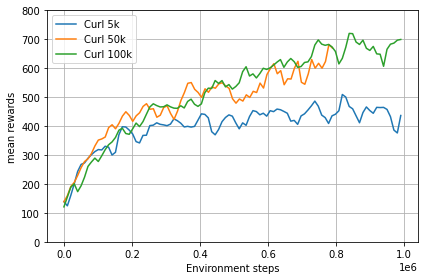

logs/SAC-AE_5k/train.log
time_elapsed: 118662 seconds or 1977 minutes
Final reward:  641.9232953661854
logs/SAC-AE_50k/train.log
time_elapsed: 121139 seconds or 2018 minutes
Final reward:  800.1083058732725
logs/SAC-AE_100k/train.log
time_elapsed: 45855 seconds or 764 minutes
Final reward:  812.662775943247
[<matplotlib.lines.Line2D object at 0x7f9f1ee26b70>, <matplotlib.lines.Line2D object at 0x7f9f1f391eb8>, <matplotlib.lines.Line2D object at 0x7f9f1ee26908>]


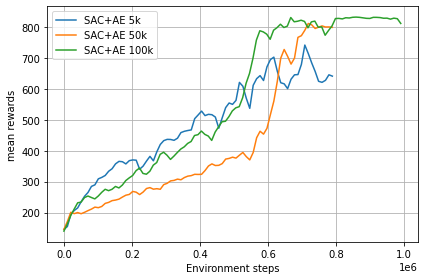

logs/SAC-AE_100k/train.log
time_elapsed: 25868 seconds or 431 minutes
Final reward:  529.3032296339127
logs/CURL_100k/train.log
time_elapsed: 16292 seconds or 271 minutes
Final reward:  527.7760071396375
logs/SAC-AE_50k/train.log
time_elapsed: 72772 seconds or 1212 minutes
Final reward:  377.65845844668246
logs/CURL_50k/train.log
time_elapsed: 60458 seconds or 1007 minutes
Final reward:  520.3998345988381
[<matplotlib.lines.Line2D object at 0x7f9f1ec44518>, <matplotlib.lines.Line2D object at 0x7f9f1ec44908>, <matplotlib.lines.Line2D object at 0x7f9f1ec44be0>, <matplotlib.lines.Line2D object at 0x7f9f1ec44eb8>]


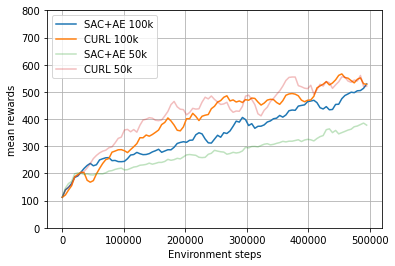

logs/SAC-AE_100k/train.log
time_elapsed: 46978 seconds or 782 minutes
Final reward:  816.1966117746515
logs/CURL_100k/train.log
time_elapsed: 35858 seconds or 597 minutes
Final reward:  686.0171009004371
logs/SAC-AE_50k/train.log
time_elapsed: 121139 seconds or 2018 minutes
Final reward:  811.5753911187977
logs/CURL_50k/train.log
time_elapsed: 107036 seconds or 1783 minutes
Final reward:  652.4215940672498
[<matplotlib.lines.Line2D object at 0x7f9f1f05e748>, <matplotlib.lines.Line2D object at 0x7f9f1f19f4a8>, <matplotlib.lines.Line2D object at 0x7f9f1f05eda0>, <matplotlib.lines.Line2D object at 0x7f9f1f05ef60>]


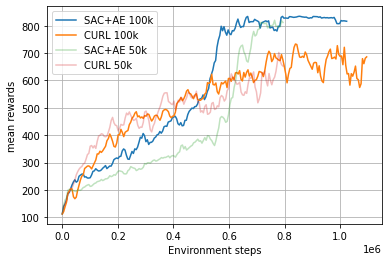

In [24]:
# plotting Curl 5,50 and 100 k
average_over_last_steps = 25000
max_step = 10e5
cal_mean_each_step = 10000
plots = [0, 0, 0]
_, plots[0] = plot_data("CURL_5k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
_, plots[1] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
_, plots[2] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
print(plots)
plt.ylim((0,800))
plt.legend(plots, ["Curl 5k", "Curl 50k", "Curl 100k"])
plt.grid()
plt.tight_layout()
plt.savefig("docs/images/CURL_replay_compare")
plt.show()

plots = [0, 0, 0]
_, plots[0] = plot_data("SAC-AE_5k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
_, plots[1] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
_, plots[2] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
                        calculate_average_each_step=cal_mean_each_step, max_step=max_step)
print(plots)
plt.legend(plots, ["SAC+AE 5k", "SAC+AE 50k", "SAC+AE 100k"])
plt.grid()
plt.tight_layout()
plt.savefig("docs/images/SAC-AE_replay_compare")
plt.show()
# plot comparison of SAC-AE and CURL
max_step  =5e5
average_over_last_steps = 20000
cal_mean_each_step = 5000

plots = [0] * 4
plots[0] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
plots[1] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
plots[2] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
plots[3] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
print(plots)
plt.legend(plots, ["SAC+AE 100k", "CURL 100k", "SAC+AE 50k", "CURL 50k"])

plt.ylim((0,800))
plt.grid()
plt.savefig("docs/images/compare_sac_and_curl")
plt.show()
max_step  =11e5

plots = [0] * 4
plots[0] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
plots[1] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step)[1]
plots[2] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
plots[3] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
                     calculate_average_each_step=cal_mean_each_step, max_step=max_step, alpha=0.3)[1]
print(plots)
plt.legend(plots, ["SAC+AE 100k", "CURL 100k", "SAC+AE 50k", "CURL 50k"])
plt.grid()
plt.savefig("docs/images/compare_sac_and_curl_big")
plt.show()
#
# plots = [0] * 4
# plots[0] = plot_data("SAC-AE_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5)[1]
# plots[1] = plot_data("CURL_100k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5)[1]
# plots[2] = plot_data("SAC-AE_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5, alpha=0.3)[1]
# plots[3] = plot_data("CURL_50k/train.log", average_over_last_steps=average_over_last_steps,
#                      calculate_average_each_step=cal_mean_each_step, max_step=1e5, alpha=0.3)[1]
# print(plots)
# plt.legend(plots, ["SAC+AE 100k", "CURL 100k", "SAC+AE 50k", "CURL 50k"])
# plt.show()

In [63]:
class Args():
    pass
import dmc2gym
# Visualizing kernels and featuremaps
def load_encoder_model(file_name="tmp/cartpole_06-08-2021-18-27-43-freeze-encoder"):
    args_file = open(file_name+"/args.json", 'r')
    args = Args()
    _args = json.load(args_file)
    for a in _args:
        print(a, _args[a])
        setattr(args, a, _args[a])
    utils.set_seed_everywhere(args.seed)
    domain_name =  'cartpole'
    task_name = "swingup"
    model_dir = utils.make_dir(os.path.join(file_name, 'model'))
    env = dmc2gym.make(
        domain_name=domain_name,
        task_name=task_name,
        seed=1,
        visualize_reward=False,
        from_pixels=True,
        height=100,
        width=100,
        frame_skip=8
    )
    if args.encoder_type == 'pixel':
        env = utils.FrameStack(env, k=args.frame_stack)
    shape = env.observation_space.shape
    agent = make_agent(
        # Change the image shape to accept cropped images. Keep the frame count
        obs_shape=(shape[0], 84, 84),
        action_shape=env.action_space.shape,
        args=args,
        device='cpu'
    )
    # L: Logger = torch.load(file_name + "/logger/l.pt")
    # L._sw = SummaryWriter(L.tb_dir)
    agent.load(model_dir, 50000)
    replay_buffer = utils.ReplayBuffer(
        obs_shape=env.observation_space.shape,
        action_shape=env.action_space.shape,
        capacity=args.replay_buffer_capacity,
        batch_size=args.batch_size,
        device='cpu',
        crop_size=args.image_size
    )
    replay_buffer.load(file_name, 5000)
    return agent.encoder, env, replay_buffer

import torch
import matplotlib.pyplot as plt
# PLotting kernel and activation layers

print("Loading model and logger")



encoder, env, replay_buffer = load_encoder_model()
# squares = load_squares()
# print(model)
# images = ScaledDown(images, squares).get_images()

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
# print(model.main[0])
print(encoder.query)
print(encoder.query.convs)
encoder.query.convs[0].register_forward_hook(get_activation('conv1'))
encoder.query.convs[1].register_forward_hook(get_activation('conv2'))
encoder.query.convs[2].register_forward_hook(get_activation('conv3'))
encoder.query.convs[3].register_forward_hook(get_activation('conv4'))
# env.reset()
# action = env.action_space.sample()

# next_obs, reward, done, _ = env.step(action)

Loading model and logger
action_repeat 8
actor_beta 0.9
actor_log_std_max 2
actor_log_std_min -10
actor_lr 0.001
actor_update_freq 2
agent sac_curl
alpha_beta 0.5
alpha_lr 0.0001
batch_size 256
critic_beta 0.9
critic_lr 0.001
critic_target_update_freq 2
critic_tau 0.01
discount 0.99
domain_name cartpole
encoder_feature_dim 50
encoder_lr 0.001
encoder_tau 0.05
encoder_type pixel
eval_freq 5000
frame_stack 3
freeze_encoder 50000
hidden_dim 1024
image_size 84
init_steps 1000
init_temperature 0.1
load tmp/cartpole_06-08-2021-18-27-43-freeze-encoder
num_eval_episodes 10
num_filters 32
num_layers 4
num_train_steps 1000000
only_cpu False
pre_transform_image_size 100
replay_buffer_capacity 100000
save_buffer True
save_model True
save_tb True
save_video True
seed 1
task_name swingup
work_dir tmp/cartpole_06-08-2021-18-27-43-freeze-encoder


/home/gijs/anaconda3/envs/curl2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


PixelEncoder(
  (convs): ModuleList(
    (0): Conv2d(9, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (fc): Linear(in_features=39200, out_features=50, bias=True)
  (ln): LayerNorm((50,), eps=1e-05, elementwise_affine=True)
)
ModuleList(
  (0): Conv2d(9, 32, kernel_size=(3, 3), stride=(2, 2))
  (1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
)


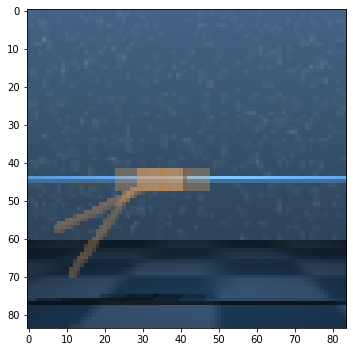

32


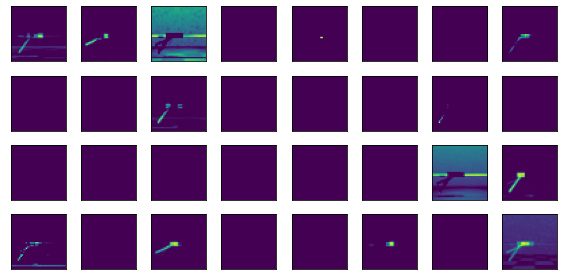

In [64]:
utils.set_seed_everywhere(1)
observation_indexes = [3]
all_obs, obs_other_augmentation, action, reward, next_obs, not_done = replay_buffer.sample()
# for i in range(len(all_obs)):
#     obs = all_obs[i]
#     plt.figure(figsize=(5,5))
#     first_frame = obs.squeeze(0)[:3].permute(1,2,0)/255
#     plt.imshow(first_frame)
#     plt.show()
fig=plt.figure(figsize=(5,5))
for plot_i, i in enumerate(observation_indexes):
    obs = all_obs[i:i+1]
    img = obs.squeeze(0)[:3]+obs.squeeze(0)[3:6]+obs.squeeze(0)[6:9]
    first_frame = img.permute(1,2,0)/(255*3)
    fig.add_subplot(1, len(observation_indexes), 1+plot_i)
    plt.imshow(first_frame)
plt.tight_layout()
plt.savefig("docs/images/example_observation")
plt.show()

for conv_index in [1]:
    for i in observation_indexes:
        obs = all_obs[i:i+1]
        encoder.query(obs)
        act = activation[f'conv{conv_index}'].squeeze()
        print(act.size(0))
        # size = act.size(0)
        size = 32
        fig=plt.figure(figsize=(8,4))
        h, w = 4,8
        # fig, axarr = plt.subplots(1, size,figsize=(15,15))
        subplot_i =0
        for idx in range(size):
            fig.add_subplot(h, w, 1+subplot_i)
            plt.imshow(torch.relu(act[idx]))
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
            subplot_i += 1
        plt.tight_layout()

    plt.savefig(f"docs/images/featuremaps_conv_{conv_index}")

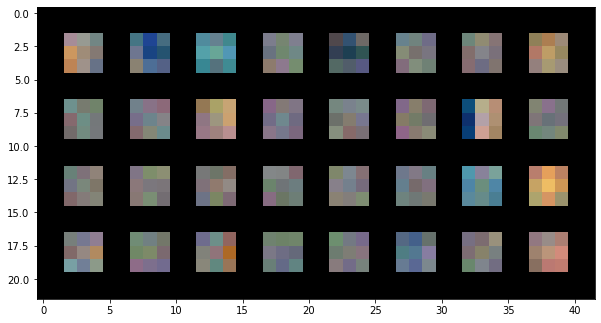

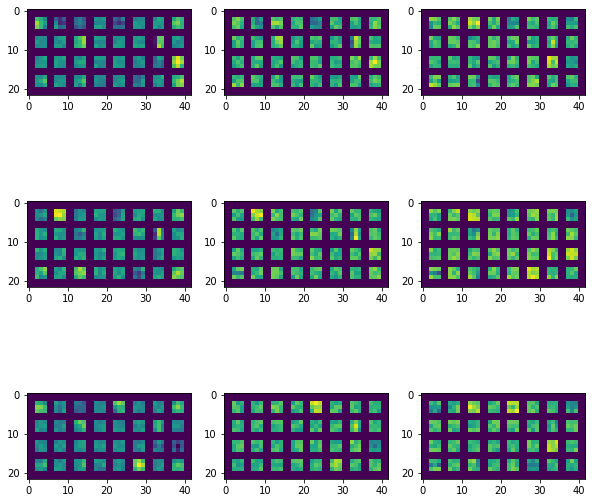

In [65]:
from torchvision.utils import make_grid
#
kernels = encoder.query.convs[0].weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
figure_size = 10
plt.figure(figsize=(10,10))
plt.imshow(img[:3,:,:].permute(1, 2, 0))
fig=plt.figure(figsize=(figure_size,figure_size))
w, h = 3,3
for i in range(len(img)):
    fig.add_subplot(w, h, 1+i)
    plt.imshow(img[i:i+1].permute(1, 2, 0))

# kernels = encoder.main[3].weight.detach().clone()
# kernels = kernels - kernels.min()
# kernels = kernels / kernels.max()
# img = make_grid(kernels)
# figure_size = 10
# fig=plt.figure(figsize=(figure_size,figure_size))
# w, h = 8,1
# for i in range(len(img)):
#     fig.add_subplot(w, h, 1+i)
#     plt.imshow(img[i:i+1].permute(1, 2, 0))